In [3]:
import pandas as pd

In [4]:
dataset=pd.read_csv("insurance_pre.csv")

In [5]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [6]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [7]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0
1334,18,31.920,0,2205.98080,0,0
1335,18,36.850,0,1629.83350,0,0
1336,21,25.800,0,2007.94500,0,0


In [8]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [9]:
from matplotlib import pyplot as plt

In [10]:
independent=dataset[['age','bmi','children','sex_male','smoker_yes']]
dependent=dataset[['charges']]

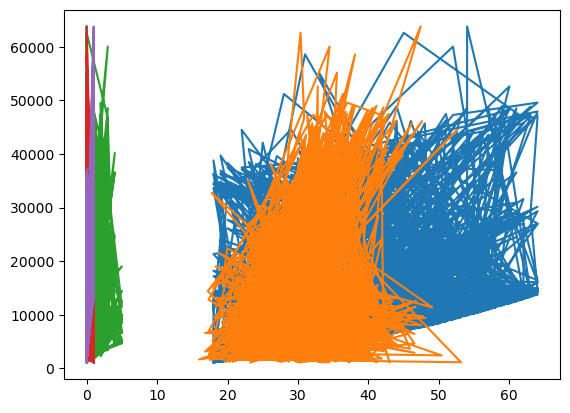

In [11]:
plt.plot(independent,dependent)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
param_grid={'criterion':['mse','mae','friedman_mse'],
            'max_features':['auto','sqrt','log2'],
            'splitter':['best','random']}

grid=GridSearchCV(DecisionTreeRegressor(),param_grid,refit=True,verbose=3,n_jobs=-1)

grid=grid.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\kathi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
70 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kathi\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kathi\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\kathi\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kathi\anaconda3\Lib\site-packages\s

In [15]:
re=grid.cv_results_
print("The R_score value for best parameters{}:".format(grid.best_params_))
table=pd.DataFrame.from_dict(re)
table

The R_score value for best parameters{'criterion': 'friedman_mse', 'max_features': 'sqrt', 'splitter': 'best'}:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001203,0.002406,0.000000,0.000000,mse,auto,best,"{'criterion': 'mse', 'max_features': 'auto', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
1,0.001022,0.001150,0.000000,0.000000,mse,auto,random,"{'criterion': 'mse', 'max_features': 'auto', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
2,0.001040,0.001304,0.000000,0.000000,mse,sqrt,best,"{'criterion': 'mse', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
3,0.002916,0.002714,0.000000,0.000000,mse,sqrt,random,"{'criterion': 'mse', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
4,0.003388,0.003017,0.000000,0.000000,mse,log2,best,"{'criterion': 'mse', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
5,0.002409,0.003008,0.000000,0.000000,mse,log2,random,"{'criterion': 'mse', 'max_features': 'log2', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
6,0.001616,0.002356,0.000000,0.000000,mae,auto,best,"{'criterion': 'mae', 'max_features': 'auto', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
7,0.000607,0.001213,0.000000,0.000000,mae,auto,random,"{'criterion': 'mae', 'max_features': 'auto', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8,0.001558,0.002982,0.000000,0.000000,mae,sqrt,best,"{'criterion': 'mae', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
9,0.001611,0.001719,0.000000,0.000000,mae,sqrt,random,"{'criterion': 'mae', 'max_features': 'sqrt', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [16]:
grid_pred=grid.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,grid_pred)
r_score

0.7010307070280616

In [18]:
age_input=float(input("Age:"))
bmi_input=float(input("BMI:"))
Children_input=float(input("Children:"))
Sex_male_input=float(input("Sex_Male 0 or 1:"))
somker_yes_input=float(input("Smoker_Yes 0 or 1:"))

Age: 32
BMI: 25
Children: 1
Sex_Male 0 or 1: 0
Smoker_Yes 0 or 1: 1


In [48]:
Result=grid.predict([[age_input,bmi_input,Children_input,Sex_male_input,somker_yes_input]])
print("Prediction for the given values {}:".format(Result))

Prediction for the given values [2291197.32936186]:
